In [2]:
# Apply Noise to an Image ( 5 types )
import cv2
import numpy as np
import matplotlib.pyplot as plt

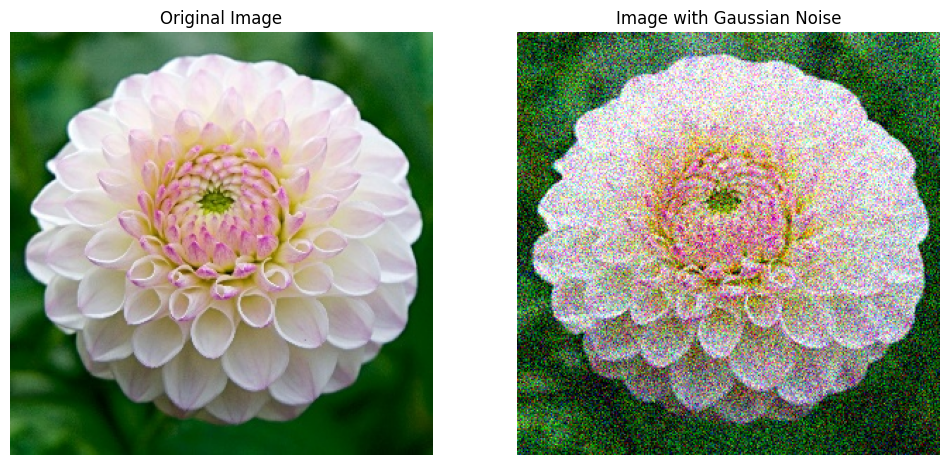

In [2]:
# gaussian noise

img = cv2.imread("resized_image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  


mean = 0   
sigma = 50


gaussian = np.random.normal(mean, sigma, img.shape).astype(np.float32)
noisy_img = img.astype(np.float32) + gaussian
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)


plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Image with Gaussian Noise")
plt.imshow(noisy_img)
plt.axis("off")

plt.show()


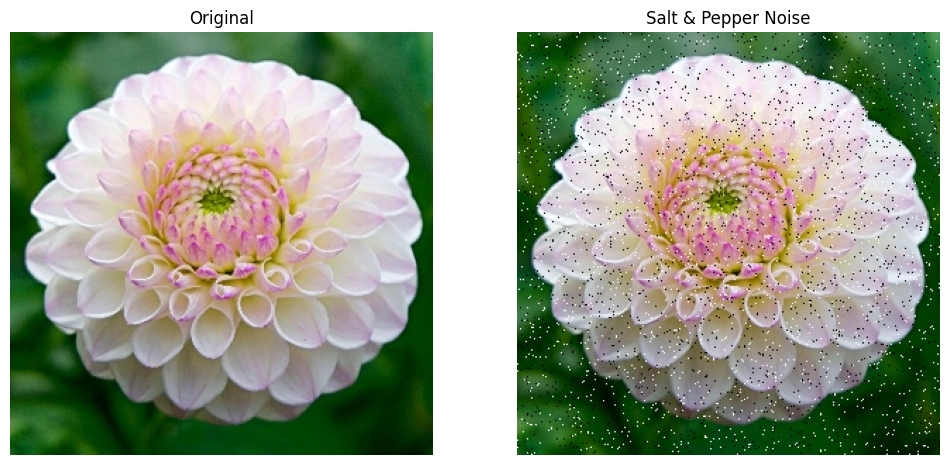

In [3]:
# Salt and pepper noise


def salt_pepper_noise(image, salt_prob=0.1, pepper_prob=0.15):
    noisy = np.copy(image)
    h, w, c = image.shape
    
    # Salt noise
    num_salt = int(np.ceil(salt_prob * h * w))
    coords = (np.random.randint(0, h, num_salt), np.random.randint(0, w, num_salt))
    noisy[coords] = [255, 255, 255]

    # Pepper noise
    num_pepper = int(np.ceil(pepper_prob * h * w))
    coords = (np.random.randint(0, h, num_pepper), np.random.randint(0, w, num_pepper))
    noisy[coords] = [0, 0, 0]

    return noisy


noisy_img = salt_pepper_noise(img, 0.02, 0.02)


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Salt & Pepper Noise")
plt.imshow(noisy_img)
plt.axis("off")

plt.show()


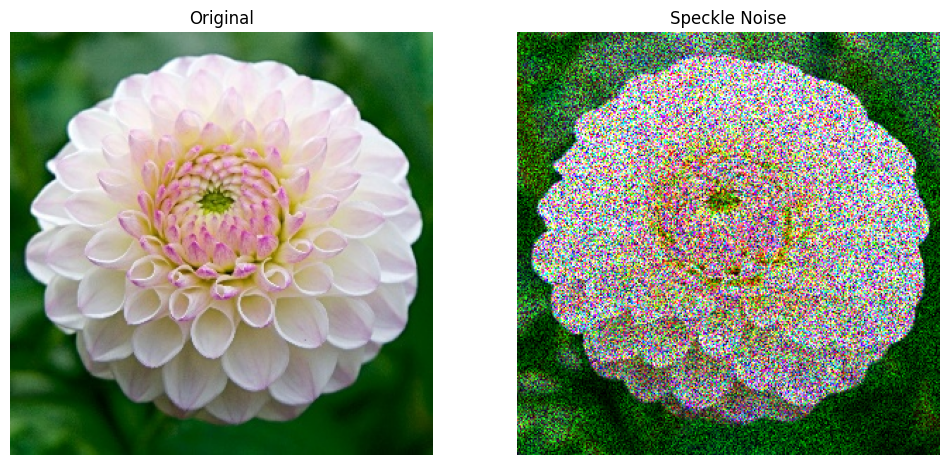

In [4]:
# speckle noise

def speckle_noise(image, var=0.4):
    noisy = np.copy(image).astype(np.float32) / 255.0  
    h, w, c = image.shape
    

    noise = np.random.normal(0, var ** 0.5, (h, w, c))
    noisy = noisy + noisy * noise
    noisy = np.clip(noisy * 255, 0, 255).astype(np.uint8)
    return noisy

noisy_img = speckle_noise(img, var=0.5)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Speckle Noise")
plt.imshow(noisy_img)
plt.axis("off")

plt.show()


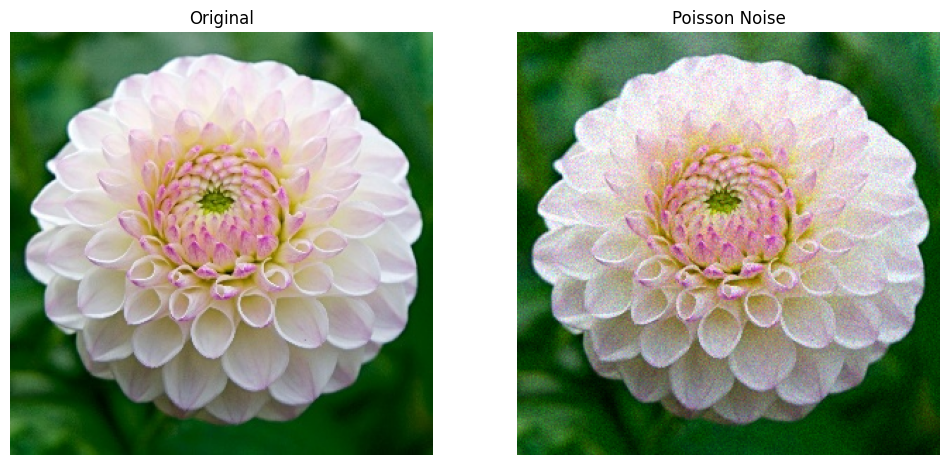

In [5]:
# poisson noise

def poisson_noise(image):

    img_float = image.astype(np.float32) / 255.0
    noisy = np.random.poisson(img_float * 255) / 255.0
    noisy = np.clip(noisy, 0, 1) * 255
    noisy = noisy.astype(np.uint8)
    return noisy

noisy_img = poisson_noise(img)

# Display
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Poisson Noise")
plt.imshow(noisy_img)
plt.axis("off")

plt.show()


In [6]:
# Apply mean and Median filters for removing noise from images

In [7]:
# applying salt-and-pepper noise
def salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.01):
    noisy = np.copy(image)
    # Salt noise
    num_salt = np.ceil(salt_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
    noisy[tuple(coords)] = 255

    # Pepper noise
    num_pepper = np.ceil(pepper_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
    noisy[tuple(coords)] =0

    return noisy


img = cv2.imread("resized_image.jpg", cv2.IMREAD_COLOR)
noisy_img = salt_pepper_noise(img, 0.02, 0.02)
cv2.imwrite("noisy_sample.jpg", noisy_img)



True

In [8]:
# applying mean filter
# define kernel i.e a 3x3 matrix with all values 1/9
kernel = np.ones((3,3), dtype = np.uint8)/9


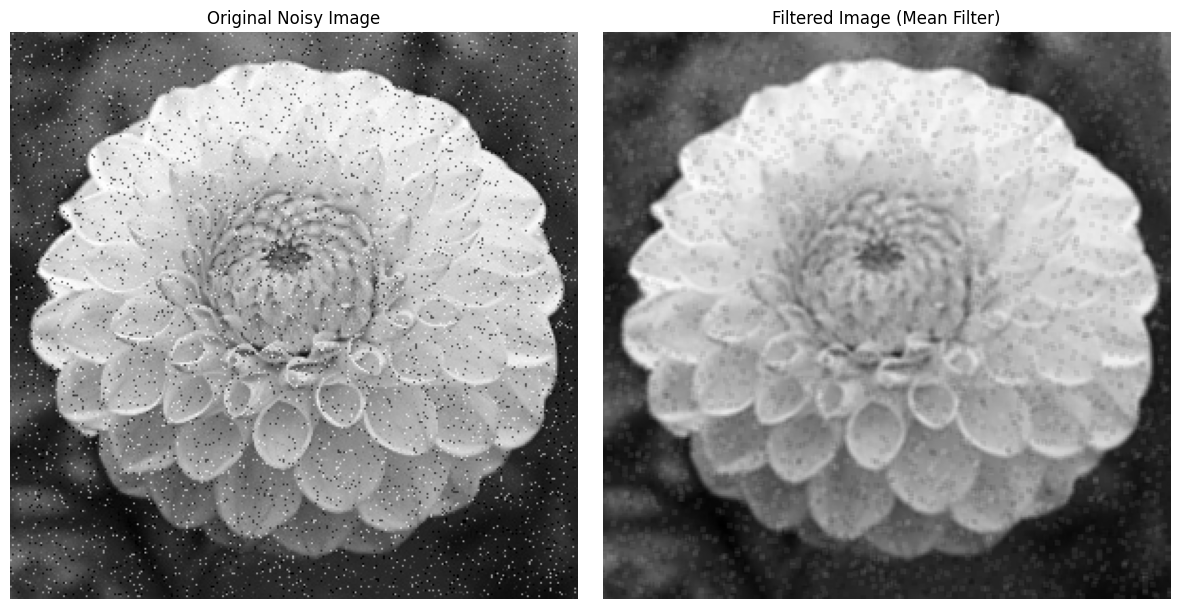

In [12]:

def mean_filter(original, mask):
    image_row, image_col = original.shape
    mask_row, mask_col = mask.shape

    row_iteration = image_row - mask_row
    col_iteration = image_col - mask_col

    result = np.zeros((row_iteration + 1, col_iteration + 1), dtype=np.uint8)

    if row_iteration > 0 or col_iteration > 0:
        for i in range(row_iteration + 1):
            for j in range(col_iteration + 1):
                result[i][j] = mean_value(original[i:i + mask_row, j:j + mask_col], mask)
    else:
        print("The original img is the same size as kernel or smaller than the kernel")

    return result

def mean_value(A, B):
    res = 0
    if A.shape == B.shape:
        for i in range(B.shape[0]):
            for j in range(B.shape[1]):
                res += A[i, j] * B[i, j]
    else:
        print("Matrices are not the same size")
    return res

def plot_image(image_1, title_1, image_2, title_2):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title(title_1)
    plt.imshow(image_1, cmap="gray")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title(title_2)
    plt.imshow(image_2, cmap="gray")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def main():
 
    image_path = "noisy_sample.jpg"
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    filtered_image = mean_filter(original_image, kernel)
    plot_image(original_image, "Original Noisy Image", filtered_image, "Filtered Image (Mean Filter)")
main()


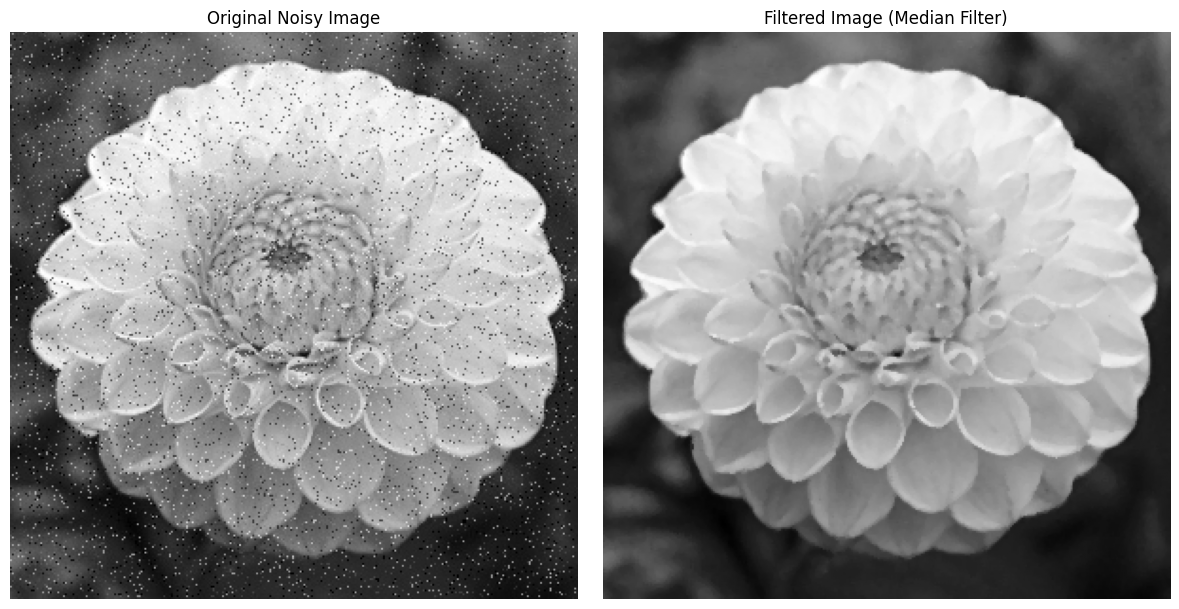

In [3]:
# Median filtering
def create_list(array):
    return array.flatten().tolist()


def sort(input_list):
    return sorted(input_list)

# Calculate median 
def median_value(sorted_array):
    n = len(sorted_array)
    if n % 2 == 1:
        return sorted_array[n // 2]
    else:
        return (sorted_array[n // 2 - 1] + sorted_array[n // 2]) // 2


def median_filter(image, kernel_size=3):
    col, row = image.shape

    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='edge')

    result = np.zeros_like(image)

    for i in range(col):
        for j in range(row):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            values = create_list(region)
            sorted_values = sort(values)
            result[i, j] = median_value(sorted_values)

    return result


def plot_image(image_1, title_1, image_2, title_2):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title(title_1)
    plt.imshow(image_1, cmap="gray")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(title_2)
    plt.imshow(image_2, cmap="gray")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


def main():
    image_path = "noisy_sample.jpg"
    noisy_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    filtered_image = median_filter(noisy_image, kernel_size=3)

    plot_image(noisy_image, "Original Noisy Image", filtered_image, "Filtered Image (Median Filter)")

main()
